In [10]:
import numpy as np
import pandas as pd
# import dask.dataframe as dd
from urllib.parse import urlparse

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_squared_error

import matplotlib.pyplot as plt
from scipy.sparse import load_npz

In [11]:
# domain_index = pd.read_csv('../02_data/data_archive/raphaela/lasser/domain_pc1.csv')
# chat_index = np.load('../02_data/telegram/telegram/chat_index.npy')
# urls_sample = pd.read_csv('../02_data/url_sample_with_titles.csv')

In [12]:
domain_index = pd.read_csv('../02_data/domain_pc1.csv')
chat_index = np.load('../02_data/chat_index.npy')
urls_sample = pd.read_csv('../02_data/url_sample_with_titles.csv')

In [13]:
# urls = pd.read_csv('../02_data/urls_with_titles.csv')

In [14]:
chat_url_shares = load_npz('../02_data/chat_url_shares.npz')

In [15]:
print("Chat Index Shape:", chat_index.shape)
print(urls_sample.head())

Chat Index Shape: (27592,)
   id                                                url  \
0   0    https://odysee.com/@jermwarfare:2/The-Baileys:8   
1   1  https://drsambailey.com/its-elementary-my-dear...   
2   2  https://drsambailey.com/why-nobody-had-caught-...   
3   4  https://jonrappoport.substack.com/p/the-millio...   
4   5  https://planetwavesfm.substack.com/p/charlatan...   

                   start_date                    end_date  \
0  2022-11-02 12:23:51.000000  2023-07-06 06:32:09.670223   
1  2022-10-21 13:34:58.000000  2023-07-02 23:53:32.622164   
2  2022-10-16 11:39:22.000000  2023-08-29 11:36:47.872883   
3  2022-09-02 00:49:46.000000  2023-07-26 07:43:27.738645   
4  2022-08-30 11:03:48.000000  2023-08-30 02:54:26.620981   

                       domain  \
0                  odysee.com   
1             drsambailey.com   
2             drsambailey.com   
3   jonrappoport.substack.com   
4  planetwavesfm.substack.com   

                                              

### Jana Lasser PCA results (Groundtruth)

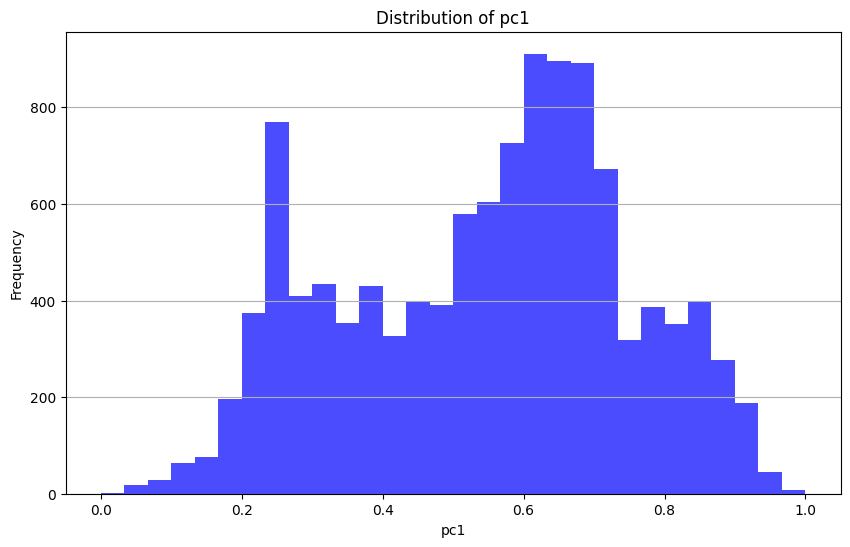

Top 5 rows with the highest pc1 scores:
                 domain       pc1
0           reuters.com  1.000000
1            apnews.com  0.998049
2  charitynavigator.org  0.985752
3          rollcall.com  0.982851
4    smithsonianmag.com  0.971184

Bottom 5 rows with the lowest pc1 scores:
                domain       pc1
11519  naturalnews.com  0.000000
11518    worldtruth.tv  0.017644
11517    davidicke.com  0.041614
11516    pandemic.news  0.043817
11513        rense.com  0.044752


In [16]:
# Plot the distribution of the 'pc1' column
plt.figure(figsize=(10, 6))
plt.hist(domain_index['pc1'], bins=30, color='blue', alpha=0.7)
plt.title('Distribution of pc1')
plt.xlabel('pc1')
plt.ylabel('Frequency')
plt.grid(axis='y')
plt.show()

# Show the row with the highest 'pc1' score
highest_scores = domain_index.nlargest(5, 'pc1')
print("Top 5 rows with the highest pc1 scores:")
print(highest_scores)

# Show the 5 rows with the lowest 'pc1' scores
lowest_scores = domain_index.nsmallest(5, 'pc1')
print("\nBottom 5 rows with the lowest pc1 scores:")
print(lowest_scores)


In [17]:
# Step 2: Match domains with domain_index
urls_sample = pd.merge(urls_sample, domain_index, on='domain', how='inner')

# Display the first few rows of the merged DataFrame
print(urls_sample.head())

# Drop rows where the domain was not found in domain_index
urls_sample.dropna(subset=['pc1'], inplace=True)

   id                                                url  \
0  39  https://vernoncoleman.org/articles/vernon-cole...   
1  47  https://vernoncoleman.org/articles/passing-obs...   
2  48  https://vernoncoleman.org/articles/whooping-co...   
3  79  https://vernoncoleman.org/articles/passing-obs...   
4  80  https://vernoncoleman.org/articles/stuff-you-n...   

                   start_date                    end_date             domain  \
0  2023-05-30 11:12:51.426699  2023-06-14 13:44:37.560958  vernoncoleman.org   
1  2023-05-29 11:36:56.000000  2023-05-30 12:17:07.803385  vernoncoleman.org   
2  2023-05-29 11:35:56.000000  2023-07-06 03:43:36.009490  vernoncoleman.org   
3  2023-05-25 10:54:15.000000  2023-05-30 12:18:18.094074  vernoncoleman.org   
4  2023-05-25 10:54:10.000000  2023-05-30 12:18:18.285070  vernoncoleman.org   

                                              title       pc1  
0  vernon coleman challenges entire bbc verify team  0.569545  
1                          pas

### Chat Index

In [20]:
url_chat_mapping = pd.DataFrame({'url_index': chat_url_shares.col, 'chat_index': chat_url_shares.row})

# Assuming 'id' in urls_sample corresponds to 'url_index' in chat_url_share
urls_sample = urls_sample.rename(columns={'id': 'url_index'})  # Rename 'id' to match the mapping key
urls_sample = urls_sample.merge(url_chat_mapping, on='url_index', how='left')

In [21]:
print(urls_sample.head())

   url_index                                                url  \
0         39  https://vernoncoleman.org/articles/vernon-cole...   
1         39  https://vernoncoleman.org/articles/vernon-cole...   
2         39  https://vernoncoleman.org/articles/vernon-cole...   
3         39  https://vernoncoleman.org/articles/vernon-cole...   
4         39  https://vernoncoleman.org/articles/vernon-cole...   

                   start_date                    end_date             domain  \
0  2023-05-30 11:12:51.426699  2023-06-14 13:44:37.560958  vernoncoleman.org   
1  2023-05-30 11:12:51.426699  2023-06-14 13:44:37.560958  vernoncoleman.org   
2  2023-05-30 11:12:51.426699  2023-06-14 13:44:37.560958  vernoncoleman.org   
3  2023-05-30 11:12:51.426699  2023-06-14 13:44:37.560958  vernoncoleman.org   
4  2023-05-30 11:12:51.426699  2023-06-14 13:44:37.560958  vernoncoleman.org   

                                              title       pc1  chat_index  
0  vernon coleman challenges entire bbc 

### Filter 100 most forwarded url per domain

In [25]:
url_shares = chat_url_shares.sum(axis=0)

# Merge this total shares data into `urls_sample`
urls_sample = urls_sample.set_index('url_index')  # Set 'id' as index to match `url_shares` index
urls_sample['total_shares'] = url_shares

# Step 3: Group by domain and select top 100 most shared URLs per domain
top_100_per_domain = (
    urls_sample
    .sort_values(['domain', 'total_shares'], ascending=[True, False])  # Sort by domain and shares
    .groupby('domain')
    .head(100)  # Select top 100 for each domain
)

# Reset index if needed
top_100_per_domain = top_100_per_domain.reset_index()

ValueError: Length of values (65338) does not match length of index (5043715)

### Datetime

In [22]:
urls_sample['start_date'] = pd.to_datetime(urls_sample['start_date'])
urls_sample['start_year'] = urls_sample['start_date'].dt.year

In [ ]:
urls_sample

### Title Embedding with Bert

In [ ]:
from sentence_transformers import SentenceTransformer

# Load the pre-trained model for generating embeddings
model = SentenceTransformer('bert-base-nli-mean-tokens') 

# Convert the title column to embeddings
urls_sample['title_embedding'] = urls_sample['title'].apply(lambda x: model.encode(str(x)))

### MLP

In [ ]:
# Step 3: Combine Features
# Use the domain index and chat index as features
# Extract the features for the MLP (concatenate start_year and title embedding)
X = urls_sample.apply(lambda row: [row['start_year']] + [row['chat_index']] + list(row['title_embedding']), axis=1).tolist()

# Convert the list of lists into a numpy array for training the MLP
X = np.array(X)

# Display the shape of the input features
print(X.shape)

#X = urls_sample[['start_year', 'chat_idx']].values
y = urls_sample['pc1'].values  

In [ ]:
# Step 4: Train an MLP Model
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the MLP regressor
mlp = MLPRegressor(hidden_layer_sizes=(64, 32), activation='relu', solver='adam', max_iter=500, random_state=42)
mlp.fit(X_train, y_train)

# Make predictions
y_pred = mlp.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse}')

# Display the first few predictions
print("Predictions vs Actual:\n", pd.DataFrame({'Predicted': y_pred[:5], 'Actual': y_test[:5]}))

from sklearn.metrics import r2_score

# Calculate R² for the model
r2 = r2_score(y_test, y_pred)
print(f'R² Score: {r2}')

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.metrics import mean_squared_error, r2_score

# Predictions vs. Actual Values
plt.figure(figsize=(10, 5))
plt.scatter(y_test, y_pred, alpha=0.7, color='b')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')  # Ideal line
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("MLP Model: Predictions vs Actual Values")
plt.show()

# Residual Plot
residuals = y_test - y_pred
plt.figure(figsize=(10, 5))
sns.histplot(residuals, kde=True, bins=30)
plt.xlabel("Residuals")
plt.ylabel("Frequency")
plt.title("Residual Plot")
plt.show()

# Plotting training loss curve if available
if hasattr(mlp, 'loss_curve_'):
    plt.figure(figsize=(10, 5))
    plt.plot(mlp.loss_curve_, label='Training Loss')
    plt.xlabel("Epoch")
    plt.ylabel("Mean Squared Error")
    plt.title("MLP Training Loss Curve")
    plt.legend()
    plt.show()
else:
    print("Loss curve not available.")


### Export

In [ ]:
import os

# Save the DataFrame as a CSV file in the '02_data' folder
folder_path = "../02_data/"
csv_path = os.path.join(folder_path, 'url_titles_domains.csv')
urls_sample.to_csv(csv_path, index=False)

In [ ]:
# Compress and save the DataFrame as a .gz file
csv_gz_path = os.path.join(folder_path, 'url_titles_domains.csv.gz')
urls_sample.to_csv(csv_gz_path, index=False, compression='gzip')